# Dod-Breed Classifier

# 1: 120 Class Classifier

### Here I am trying to detect the different breeds of dogs. 
### Data was Obtained from Kaggel the link is provided here https://www.kaggle.com/c/dog-breed-identification/data


### The number of classes/breeds in this dataset is 120 and I am trying to predict amoung that.

# Loading the Data and Preprocessing

In [ ]:
img_path = r"C:\Users\amalr\OneDrive\Desktop\data\train"

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import random

In [5]:
df = pd.read_csv(r"C:\Users\amalr\OneDrive\Desktop\data\dog_breed_labels.csv")

In [4]:
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [9]:
# Class names
names = list(df["breed"].unique())

In [72]:
# creating the training data
training_data = []
for i in range(len(df)):
    path = os.path.join(img_path,df["id"][i])+".jpg"
    #print(path)
    img_arr = cv2.imread(path,1)
    #print(img_arr.shape)
    img_arr = cv2.resize(img_arr,(224,224))
    training_data.append([img_arr,names.index(df["breed"][i])])
    

In [73]:
# number of data points
len(training_data)

10222

In [74]:
random.shuffle(training_data)    

In [75]:
# Creating  the data and variable
x = []
y = []
for img,label in training_data:
    x.append(img)
    y.append(label)
    

In [76]:
# Scaling the data
x = np.array(x)/255

In [77]:
x.shape

(10222, 224, 224, 3)

In [ ]:
y = np.array(y)
y.shape

In [118]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state= 1)

# Model Creation

### Since the problem at hand is a very huge one the I am using transfer learning.
### I am using the pretrained Mobilenet_V2 model.
### Model takes in images of size (224,224,3)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Activation,Flatten,MaxPooling2D
import tensorflow_hub as hub

In [15]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### this"feature_extractor" is the same model as the Mobilenet-V2 except for the last layer it is excluded here.

In [16]:
mobnet = hub.KerasLayer(feature_extractor,input_shape=(224,224,3),trainable = False)

In [90]:
classes = 120
model = Sequential()
model.add(mobnet)
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [91]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               163968    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               15480     
_________________________________________________________________
activation_5 (Activation)    (None, 120)               0         
Total params: 2,437,432
Trainable params: 179,448
Non-trainable params: 2,257,984
_________________________________________________________________


In [93]:
model.compile(optimizer="adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [94]:
model.fit(x,y,epochs=5,validation_split=0.3)

Epoch 1/5
224/224 [==============================] - 219s 957ms/step - loss: 3.4935 - accuracy: 0.2484 - val_loss: 1.3697 - val_accuracy: 0.5911
Epoch 2/5
224/224 [==============================] - 197s 880ms/step - loss: 1.0552 - accuracy: 0.6928 - val_loss: 1.2575 - val_accuracy: 0.6247
Epoch 3/5
224/224 [==============================] - 190s 850ms/step - loss: 0.6963 - accuracy: 0.7873 - val_loss: 1.2080 - val_accuracy: 0.6469
Epoch 4/5
224/224 [==============================] - 192s 859ms/step - loss: 0.4888 - accuracy: 0.8586 - val_loss: 1.1345 - val_accuracy: 0.6648
Epoch 5/5
224/224 [==============================] - 191s 853ms/step - loss: 0.3520 - accuracy: 0.9055 - val_loss: 1.1388 - val_accuracy: 0.6717


In [98]:
res = model.predict([x[500:501]])
names[int(np.argmax(res))]

'siberian_husky'

In [99]:
names[y[500]]

'siberian_husky'

In [100]:
model.save('breedclassifier')

INFO:tensorflow:Assets written to: breedclassifier\assets


INFO:tensorflow:Assets written to: breedclassifier\assets


In [30]:
def prepare(path):
    img_arr = cv2.imread(path,1)
    #print(img_arr.shape)
    img_arr = cv2.resize(img_arr,(224,224))
    img_arr = img_arr/255
    
    return img_arr[np.newaxis, ...]

In [117]:
res1 = model.predict([prepare("rocky.jpeg")])
names[int(np.argmax(res1))]

'samoyed'

### Image I gave as Input


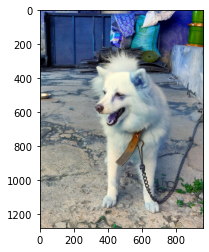

In [115]:
import matplotlib.pyplot as plt
plt.imshow(cv2.imread("rocky.jpeg"))

### Example of "samoyed" Model predicted
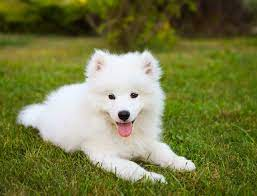

### We can see here that even though the validation accuracy is around the 70s, Model is actually able to perform fairly good.
### We can see an example for its working above

# 2: 10 Class Classifer

In [1]:
img_path = r"C:\Users\amalr\OneDrive\Desktop\data\train"

In [2]:
# Selected dog_breeds
dog_breeds = ["beagle", "chihuahua", "doberman",
"french_bulldog", "golden_retriever", "malamute", "pug", "saint_bernard", "scottish_deerhound",
"tibetan_mastiff"]

In [6]:
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [7]:
# loading and preprocessing the data
training_data = []
for i in range(len(df)):
    if df["breed"][i] in dog_breeds:
        path = os.path.join(img_path,df["id"][i])+".jpg"
        #print(path)
        img_arr = cv2.imread(path,1)
        #print(img_arr.shape)
        img_arr = cv2.resize(img_arr,(224,224))
        training_data.append([img_arr,dog_breeds.index(df["breed"][i])])

In [8]:
len(training_data)

841

In [9]:
random.shuffle(training_data)

In [23]:
# Creating  the data and variable
x1 = []
y1 = []
for img,label in training_data:
    x1.append(img)
    y1.append(label)

In [24]:
#Scaling the data
x1 = np.array(x1)/255

In [25]:
y1 = np.array(y1)
y.shape

(1682,)

# Model creation, training and testing

In [19]:
classes = len(dog_breeds)
model1 = Sequential()
model1.add(mobnet)
model1.add(Dense(128))
model1.add(Activation("relu"))
model1.add(Dense(classes))
model1.add(Activation("softmax"))

In [20]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               163968    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 2,423,242
Trainable params: 165,258
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
model1.compile(optimizer="adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [29]:
model1.fit(x1,y1,epochs=10,validation_split=0.15)

Epoch 1/10
23/23 [==============================] - 26s 1s/step - loss: 0.0193 - accuracy: 0.9957 - val_loss: 0.3007 - val_accuracy: 0.9213
Epoch 2/10
23/23 [==============================] - 21s 938ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3330 - val_accuracy: 0.9213
Epoch 3/10
23/23 [==============================] - 21s 921ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2324 - val_accuracy: 0.9449
Epoch 4/10
23/23 [==============================] - 21s 942ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2542 - val_accuracy: 0.9528
Epoch 5/10
23/23 [==============================] - 21s 931ms/step - loss: 7.2696e-04 - accuracy: 1.0000 - val_loss: 0.2457 - val_accuracy: 0.9528
Epoch 6/10
23/23 [==============================] - 21s 940ms/step - loss: 5.9975e-04 - accuracy: 1.0000 - val_loss: 0.2480 - val_accuracy: 0.9449
Epoch 7/10
23/23 [==============================] - 21s 927ms/step - loss: 4.3470e-04 - accuracy: 1.0000 - val_loss: 0.2501 - val_accurac

In [31]:
result = model1.predict([prepare("beagle.jpg")])
dog_breeds[int(np.argmax(result))]

'beagle'

In [32]:
result = model1.predict([prepare("tibettan.jpg")])
dog_breeds[int(np.argmax(result))]

'tibetan_mastiff'

# We can see here that the model has achieved a very high accuracy and it is accuractly predicting the images outside of its training dataset.